## Определение перспективного тарифа для телеком-компании

Требуется сделать предварительный анализ тарифов на небольшой выборке клиентов компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. 
Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. 

##### Описание тарифов
##### Тариф «Смарт»
* Ежеемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей
    
##### Тариф «Ультра»
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей


### Описание данных <a class="anchor" id="first-bullet"></a>

_Таблица users (информация о пользователях):_
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

_Таблица calls (информация о звонках):_
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

_Таблица messages (информация о сообщениях):_
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

_Таблица internet (информация об интернет-сессиях):_
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

_Таблица tariffs (информация о тарифах):_
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

    
_Примечание
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся._

### Содержание:
* [Описание данных](#first-bullet)
* [Анализ входных данных таблиц users, calls, messages, internet, tariffs](#second-bullet)
* [Выводы по первичному анализу данных таблиц users, calls, messages, internet, tariffs](#third-bullet)
* [Поиск аномалий в данных, скрытых и явных дубликатов](#fourth-bullet)
* [Формирование сводных таблиц, сгруппированных по пользователям и месяцам](#fifth-bullet)
* [Визуализация данных свобной таблицы](#sixth-bullet)    
* [Общие выводы о поведение клиентов оператора](#seventh-bullet)
* [Проверка гипотез](#eight-bullet)
* [Общие выводы](#ninth-bullet)

### Описание данных <a class="anchor" id="first-bullet"></a>

_Таблица users (информация о пользователях):_
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

_Таблица calls (информация о звонках):_
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

_Таблица messages (информация о сообщениях):_
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

_Таблица internet (информация об интернет-сессиях):_
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

_Таблица tariffs (информация о тарифах):_
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import random

In [2]:
try:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')
except FileNotFoundError:
    calls = pd.read_csv('C:/Users/Sveta/Downloads/calls.csv')
    internet = pd.read_csv('C:/Users/Sveta/Downloads/internet.csv')
    messages = pd.read_csv('C:/Users/Sveta/Downloads/messages.csv')
    tariffs = pd.read_csv('C:/Users/Sveta/Downloads/tariffs.csv')
    users = pd.read_csv('C:/Users/Sveta/Downloads/users.csv')

### Анализ входных данных таблиц users, calls, messages, internet, tariffs <a class="anchor" id="second-bullet"></a>

In [3]:
dataframes = [users, calls, messages, internet, tariffs]
 
def dataframe_info():
    for dataframe in dataframes:
        print('Для ознакомления с данными выведем на экран 5 первых строк таблицы')
        display(dataframe.head())
        display(dataframe.info())

In [4]:
dataframe_info()

Для ознакомления с данными выведем на экран 5 первых строк таблицы


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

Для ознакомления с данными выведем на экран 5 первых строк таблицы


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

Для ознакомления с данными выведем на экран 5 первых строк таблицы


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

Для ознакомления с данными выведем на экран 5 первых строк таблицы


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

Для ознакомления с данными выведем на экран 5 первых строк таблицы


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

### Выводы по первичному анализу данных таблиц users, calls, messages, internet, tariffs <a class="anchor" id="third-bullet"></a>

* Датасет calls: Необходимо перевести столбец call_date в формат datetime.
* Датасет internet: Необходимо перевести столбец session_date в формат datetime.
* Датасет messages: Необходимо перевести столбец message_date в формат datetime.
* Датасет users: Необходимо перевести столбцы reg_date и churn_date в формат datetime.
* Пропуски данных есть в столбце churn_date таблицы users — дата прекращения пользования тарифом, для данного анализа пропуски данных роли не играют и остаются без изменений.
* В таблице calls есть значения 0, которые также оставляем без изменения, они означают что абонент не дозвонился и не мешают дальнейшему анализу.

#### Перевод столбцов в формат datetime

In [5]:
DATE = '%Y-%m-%d'
calls['call_date'] = pd.to_datetime(calls['call_date'], format=DATE)
internet['session_date'] = pd.to_datetime(internet['session_date'], format=DATE)
messages['message_date'] = pd.to_datetime(messages['message_date'], format=DATE)
users['reg_date'] = pd.to_datetime(users['reg_date'], format=DATE)
users['churn_date'] = pd.to_datetime(users['churn_date'], format=DATE)


### Поиск аномалий в данных, скрытых и явных дубликатов <a class="anchor" id="fourth-bullet"></a>

#### Анализ таблицы calls:

In [6]:
print(calls['duration'].describe()) 
print(calls['id'].unique())
print(calls.duplicated().sum())

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64
['1000_0' '1000_1' '1000_2' ... '1499_217' '1499_218' '1499_219']
0


* Данные по продолжительности вызовов не вызывают вопросов, минимальная продолжительность 0, максимальная - 38 минут, средняя 6,75 минут.
* Уникальные значения столбца id не имеют аномалий.
* Явные дубликаты не выявлены.

In [7]:
calls['user_id'].unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099,
       1100, 1101, 1102, 1103, 1104, 1105, 1107, 1108, 1109, 1110, 1111,
       1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122,
       1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132, 1133, 1134,
       1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145,
       1146, 1147, 1148, 1149, 1150, 1151, 1152, 11

* Уникальные значения столбца user_id не имеют аномалий

In [8]:
print(calls['call_date'].dt.year.sort_values(ascending = True).unique())
print (calls['call_date'].dt.month.sort_values(ascending = True).unique())
print (calls['call_date'].dt.day.sort_values(ascending = True).unique())

[2018]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


* Уникальные значения столбца call_date не имеют аномалий.

#### Анализ таблицы internet:

In [9]:
print(internet['mb_used'].describe())
print (internet['id'].unique())
print (internet.duplicated().sum())

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64
['1000_0' '1000_1' '1000_2' ... '1499_154' '1499_155' '1499_156']
0


* Данные по объему по продолжительности интернет сессий в мб не вызывают вопросов, минимальный объем траффика 0, максимальный - 1724 мб, среднее значение 370,2 мб.
* Уникальные значения столбца id не имеют аномалий.
* Явные дубликаты не выявлены.

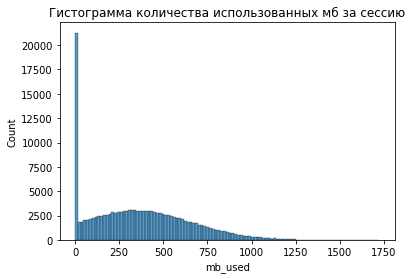

In [11]:
sns.histplot(data=internet, x='mb_used')
plt.title('Гистограмма количества использованных мб за сессию')
plt.show()

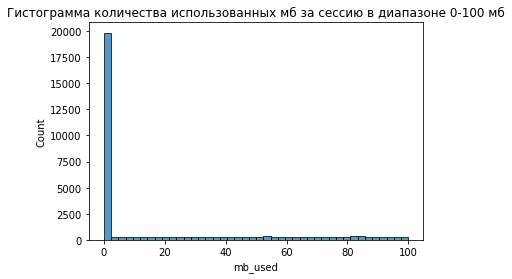

In [12]:
sns.histplot(data=internet.query('mb_used <100'), x='mb_used')
plt.title('Гистограмма количества использованных мб за сессию в диапазоне 0-100 мб')
plt.show()

* Порядка 20000 сессий с 0 траффиком, при этом сама сессия зафиксирована по времени. 
* Наличие нулевых сессий может быть связано с плохим качеством интернета, т.о. попытка загрузки зафиксирована, но траффик не использован. 
* Для того чтобы на дальнейший анализ не влияли сессии с нулевым траффиком, можно их не учитывать.

In [13]:
internet = internet.query('mb_used != 0')

#### Анализ таблицы messages:

In [14]:
print(messages['id'].unique())
print(messages.duplicated().sum())

['1000_0' '1000_1' '1000_2' ... '1499_181' '1499_182' '1499_183']
0


* Уникальные значения столбца id не имеют аномалий.
* Явные дубликаты не выявлены.

In [15]:
messages['user_id'].unique()

array([1000, 1002, 1003, 1004, 1005, 1007, 1008, 1009, 1011, 1012, 1013,
       1014, 1015, 1016, 1018, 1019, 1020, 1021, 1022, 1023, 1025, 1026,
       1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037,
       1038, 1039, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1050,
       1051, 1052, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062,
       1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074,
       1075, 1076, 1077, 1079, 1080, 1081, 1082, 1083, 1084, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1096, 1097, 1098, 1099,
       1100, 1102, 1103, 1104, 1105, 1106, 1108, 1109, 1110, 1111, 1112,
       1113, 1115, 1119, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1130,
       1131, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1154, 1155, 1156,
       1158, 1159, 1160, 1161, 1163, 1164, 1165, 1166, 1167, 1168, 1169,
       1170, 1171, 1172, 1173, 1174, 1176, 1178, 11

* Уникальные значения столбца user_id не имеют аномалий

In [16]:
print(messages['message_date'].dt.year.unique())
print(messages['message_date'].dt.month.sort_values(ascending = True).unique())
print (messages['message_date'].dt.day.sort_values(ascending = True).unique())

[2018]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


* Уникальные значения столбца message_date не имеют аномалий.

#### Анализ таблицы users:

In [17]:
users['user_id'].unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131,
       1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1143, 1144, 1145, 1146, 1147, 1148, 1149, 11

* Уникальные значения столбца user_id не имеют аномалий.

In [18]:
users['city'].sort_values(ascending = True).unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

* Уникальные значения столбца city не имеют аномалий.

In [19]:
users['last_name'].sort_values(ascending = True).unique()

array(['Ёлчина', 'Ёркин', 'Ёркина', 'Ёрохов', 'Ёрохова', 'Абаимов',
       'Абакумов', 'Абакшина', 'Абалакова', 'Абалдуева', 'Абалкин',
       'Абашкин', 'Абашкина', 'Абдулина', 'Абоимов', 'Абрамович',
       'Абрамцев', 'Абрамычева', 'Абрашина', 'Абрикосова', 'Авдеев',
       'Авдеенко', 'Авдонюшкин', 'Авдушева', 'Авдышев', 'Авдюков',
       'Авраамова', 'Авраменко', 'Авринский', 'Аврорин', 'Авроров',
       'Авросимова', 'Авросинова', 'Авсейкина', 'Авчинникова', 'Агаев',
       'Агаева', 'Агапеева', 'Агеева', 'Адаменко', 'Адамов', 'Азаров',
       'Азерников', 'Азимова', 'Акимов', 'Акимчин', 'Акимычева',
       'Акиндинов', 'Акинин', 'Акинфьев', 'Аксёнов', 'Акуленко',
       'Александрова', 'Александрович', 'Александрюк', 'Алексеева',
       'Алексеенко', 'Алексеичев', 'Аленникова', 'Алесин', 'Алехина',
       'Алешин', 'Алешина', 'Алешкова', 'Алиев', 'Алфеева', 'Алфимов',
       'Алфимова', 'Алымова', 'Алютин', 'Алюшина', 'Алёшко', 'Алёшкова',
       'Амелин', 'Амелишко', 'Амельченк

* Уникальные значения столбца last_name не имеют аномалий.

In [20]:
print (users.duplicated().sum())

0


* Явные дубликаты не выявлены.

### Формирование сводных таблиц, сгруппированных по пользователям и месяцам  <a class="anchor" id="fifth-bullet"></a>

#### Количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя

In [21]:
calls['month'] = calls['call_date'].dt.month
calls['duration'] = np.ceil(calls['duration'])
calls_info = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['count','sum'])
calls_info.columns = ['count','sum']

In [22]:
calls_info.head(10)

count    sum
user_id month              
1000    5         22  159.0
        6         43  172.0
        7         47  340.0
        8         52  408.0
        9         58  466.0
        10        57  350.0
        11        43  338.0
        12        46  333.0
1001    11        59  430.0
        12        63  414.0

#### Количество отправленных сообщений по месяцам для каждого пользователя

In [23]:
messages['month'] = messages['message_date'].dt.month
messages_info = messages.pivot_table(index = ['user_id', 'month'], values = 'message_date', aggfunc = ['count'])
messages_info.columns = ['count']


In [24]:
messages_info.head()

count
user_id month       
1000    5         22
        6         60
        7         75
        8         81
        9         57

#### Объем израсходованного интернет-трафика по месяцам для каждого пользователя

In [25]:
internet['month'] = internet['session_date'].dt.month
internet_info = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = ['count', 'sum'])
internet_info.columns = ['count', 'sum']
internet_info ['sum'] = np.ceil(internet_info ['sum']/1024)

/tmp/ipykernel_543/2668770359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internet['month'] = internet['session_date'].dt.month


In [26]:
internet_info.head(10)

count   sum
user_id month             
1000    5          4   3.0
        6         44  23.0
        7         28  14.0
        8         27  14.0
        9         25  15.0
        10        27  15.0
        11        23  15.0
        12        19  10.0
1001    11        47  18.0
        12        35  14.0

#### Сводная таблица информации о минутах разговора, количестве сообщений и объеме интернет-траффика для каждого пользователя по месяцам

In [27]:
proceeds_data = calls_info.merge(messages_info, on= ['user_id', 'month'],  how ='outer')
proceeds_data = proceeds_data.merge(internet_info, on= ['user_id', 'month'],  how ='outer')
proceeds_data.columns = ['calls_count', 'calls_sum', 'messages_count', 'internet_count', 'internet_sum']
proceeds_data = proceeds_data.reset_index()
proceeds_data = proceeds_data.merge (users, on = 'user_id', how = 'outer')


In [28]:
proceeds_data.head()

,user_id,month,calls_count,calls_sum,messages_count,internet_count,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,22.0,159.0,22.0,4.0,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,43.0,172.0,60.0,44.0,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,47.0,340.0,75.0,28.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,52.0,408.0,81.0,27.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,58.0,466.0,57.0,25.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [29]:
temp = proceeds_data.copy()
temp[(temp.user_id ==  1128) | (temp.user_id ==  1371)]

,user_id,month,calls_count,calls_sum,messages_count,internet_count,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
3214,1128,NaN,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
3215,1371,NaN,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


* Пользователи 1128 и 1371 расторгли договор через неделю после его заключения, исключим их из дальнейшего анализа.

In [30]:
proceeds_data = proceeds_data.drop(proceeds_data[(proceeds_data['user_id'] == 1128) | (proceeds_data['user_id'] == 1371)].index)

In [31]:
proceeds_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3214 non-null   int64         
 1   month           3214 non-null   float64       
 2   calls_count     3174 non-null   float64       
 3   calls_sum       3174 non-null   float64       
 4   messages_count  2717 non-null   float64       
 5   internet_count  3201 non-null   float64       
 6   internet_sum    3201 non-null   float64       
 7   age             3214 non-null   int64         
 8   churn_date      187 non-null    datetime64[ns]
 9   city            3214 non-null   object        
 10  first_name      3214 non-null   object        
 11  last_name       3214 non-null   object        
 12  reg_date        3214 non-null   datetime64[ns]
 13  tariff          3214 non-null   object        
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
me

Пропуски данных присуствуют в столбцах: 
* количество звонков, длительность звонков (отсутствуют для 40 пользователей из 3214)
* количество сообщений (отсутствуют для 497 пользователей)
* суммарный интернет-трафик и количество сессий (отсутствуют для 13 пользователей)

Пропущенные данные заменим на 0, в дальнейшем рассмотрим срез данных без пропусков в столбце суммарного интернет-траффика., т.к. пропусков именно в этих данных меньше всего в сводной таблице.


In [32]:
proceeds_data['internet_sum'] = proceeds_data['internet_sum'].fillna(0)
proceeds_data['calls_sum'] = proceeds_data['calls_sum'].fillna(0)
proceeds_data['calls_count'] = proceeds_data['calls_count'].fillna(0)
proceeds_data['messages_count'] = proceeds_data['messages_count'].fillna(0)
proceeds_data = proceeds_data.query('internet_sum!=0')

In [33]:
proceeds_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3201 entries, 0 to 3213
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3201 non-null   int64         
 1   month           3201 non-null   float64       
 2   calls_count     3201 non-null   float64       
 3   calls_sum       3201 non-null   float64       
 4   messages_count  3201 non-null   float64       
 5   internet_count  3201 non-null   float64       
 6   internet_sum    3201 non-null   float64       
 7   age             3201 non-null   int64         
 8   churn_date      186 non-null    datetime64[ns]
 9   city            3201 non-null   object        
 10  first_name      3201 non-null   object        
 11  last_name       3201 non-null   object        
 12  reg_date        3201 non-null   datetime64[ns]
 13  tariff          3201 non-null   object        
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
me

#### Информация по тарифу Smart: количество минут, сообщений, объем траффика в Гб, стоимость дополнительных услуг

In [34]:
smart_minutes = tariffs.loc[tariffs['tariff_name'] == 'smart', 'minutes_included'].to_numpy()
smart_messages = tariffs.loc[tariffs['tariff_name'] == 'smart', 'messages_included'].to_numpy()
smart_internet = tariffs.loc[tariffs['tariff_name'] == 'smart', 'mb_per_month_included'].to_numpy() /1024
smart_fee = tariffs.loc[tariffs['tariff_name'] == 'smart', 'rub_monthly_fee'].to_numpy()
smart_fee_gb = tariffs.loc[tariffs['tariff_name'] == 'smart', 'rub_per_gb'].to_numpy()
smart_fee_message = tariffs.loc[tariffs['tariff_name'] == 'smart', 'rub_per_message'].to_numpy()
smart_fee_minute = tariffs.loc[tariffs['tariff_name'] == 'smart', 'rub_per_minute'].to_numpy()

print ('Количество минут в месяц', smart_minutes)
print ('Количество сообщений в месяц', smart_messages)
print ('Количество интернет-траффика в месяц в Гб', smart_internet)
print ('Стоимость дополнительного Гб', smart_fee_gb)
print ('Стоимость дополнительной минуты', smart_fee_minute)
print ('Стоимость дополнительного сообщения', smart_fee_message)



Количество минут в месяц [500]
Количество сообщений в месяц [50]
Количество интернет-траффика в месяц в Гб [15.]
Стоимость дополнительного Гб [200]
Стоимость дополнительной минуты [3]
Стоимость дополнительного сообщения [3]


#### Информация по тарифу Ultra: количество минут, сообщений, объем траффика в Гб, стоимость дополнительных услуг

In [35]:
ultra_minutes = tariffs.loc[tariffs['tariff_name'] == 'ultra', 'minutes_included'].to_numpy()
ultra_messages = tariffs.loc[tariffs['tariff_name'] == 'ultra', 'messages_included'].to_numpy()
ultra_internet = tariffs.loc[tariffs['tariff_name'] == 'ultra', 'mb_per_month_included'].to_numpy() /1024
ultra_fee = tariffs.loc[tariffs['tariff_name'] == 'ultra', 'rub_monthly_fee'].to_numpy()
ultra_fee_gb = tariffs.loc[tariffs['tariff_name'] == 'ultra', 'rub_per_gb'].to_numpy()
ultra_fee_message = tariffs.loc[tariffs['tariff_name'] == 'ultra', 'rub_per_message'].to_numpy()
ultra_fee_minute = tariffs.loc[tariffs['tariff_name'] == 'ultra', 'rub_per_minute'].to_numpy()

print ('Количество минут в месяц', ultra_minutes)
print ('Количество сообщений в месяц', ultra_messages)
print ('Количество интернет-траффика в месяц в Гб', ultra_internet)
print ('Стоимость дополнительного Гб', ultra_fee_gb)
print ('Стоимость дополнительной минуты', ultra_fee_minute)
print ('Стоимость дополнительного сообщения', ultra_fee_message)

Количество минут в месяц [3000]
Количество сообщений в месяц [1000]
Количество интернет-траффика в месяц в Гб [30.]
Стоимость дополнительного Гб [150]
Стоимость дополнительной минуты [1]
Стоимость дополнительного сообщения [1]


In [36]:
# Функция по оценке дополнительных расходов по тарифу

def tariff_proceeds (raw):
    tariff =raw['tariff']
    call =raw['calls_sum']
    message = raw['messages_count'] 
    gbyte =raw['internet_sum']
 
    if tariff =='ultra':
        if call > ultra_minutes: 
            call = (call - ultra_minutes)*ultra_fee_minute
        else:
            call = 0
        if message > ultra_messages:
            message = (message - ultra_messages)*ultra_fee_message 
        else:
            message = 0
 
        if gbyte > ultra_internet:
            gbyte = (gbyte - ultra_internet)*ultra_fee_gb
        else:
            gbyte =0
 
    if tariff == 'smart':
        if call > smart_minutes: 
            call =(call - smart_minutes)*smart_fee_minute
        else:
            call = 0
 
        if message > smart_messages:
            message =(message - smart_messages)*smart_fee_message
        else:
            message = 0
 
        if gbyte > smart_internet:
                gbyte =(gbyte -smart_internet) *smart_fee_gb
        else:
            gbyte = 0
    return call + message + gbyte
 


#### Сводная таблица с информацией о дополнительных расходах по тарифам

In [37]:
proceeds_data['tariff_expenses'] = proceeds_data.apply(tariff_proceeds, axis =1)
proceeds_data['tariff_expenses'] = proceeds_data['tariff_expenses'].astype(int)
proceeds_data.head(50)

,user_id,month,calls_count,calls_sum,messages_count,internet_count,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_expenses
0,1000,5.0,22.0,159.0,22.0,4.0,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
1,1000,6.0,43.0,172.0,60.0,44.0,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
2,1000,7.0,47.0,340.0,75.0,28.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
3,1000,8.0,52.0,408.0,81.0,27.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
4,1000,9.0,58.0,466.0,57.0,25.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
5,1000,10.0,57.0,350.0,73.0,27.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
6,1000,11.0,43.0,338.0,58.0,23.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
7,1000,12.0,46.0,333.0,70.0,19.0,10.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
8,1001,11.0,59.0,430.0,0.0,47.0,18.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,600
9,1001,12.0,63.0,414.0,0.0,35.0,14.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,0


In [38]:
# Функция по оценке суммарных расходов по тарифу

def pay_info (raw):
    tariff =raw['tariff']
    proceeds = raw['tariff_expenses']
 
    if tariff =='ultra':
        if proceeds != 0: 
            pay = ultra_fee + proceeds
        else:
            pay = ultra_fee
    if tariff == 'smart':
        if proceeds != 0: 
            pay = smart_fee + proceeds
        else:
            pay = smart_fee
    return pay
 


#### Сводная таблица с информацией о суммарных расходах по тарифам

In [39]:
proceeds_data['pay_info'] =proceeds_data.apply(pay_info, axis =1)
proceeds_data['pay_info'] = proceeds_data['pay_info'].astype(int)
proceeds_data.head(50)

,user_id,month,calls_count,calls_sum,messages_count,internet_count,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,tariff_expenses,pay_info
0,1000,5.0,22.0,159.0,22.0,4.0,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,1950
1,1000,6.0,43.0,172.0,60.0,44.0,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,1950
2,1000,7.0,47.0,340.0,75.0,28.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,1950
3,1000,8.0,52.0,408.0,81.0,27.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,1950
4,1000,9.0,58.0,466.0,57.0,25.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,1950
5,1000,10.0,57.0,350.0,73.0,27.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,1950
6,1000,11.0,43.0,338.0,58.0,23.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,1950
7,1000,12.0,46.0,333.0,70.0,19.0,10.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,1950
8,1001,11.0,59.0,430.0,0.0,47.0,18.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,600,1150
9,1001,12.0,63.0,414.0,0.0,35.0,14.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,0,550


<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо! Прописали расчет выручки. Только можно было все в одну колонку собрать.</font>

### Визуализация данных свобной таблицы <a class="anchor" id="sixth-bullet"></a>

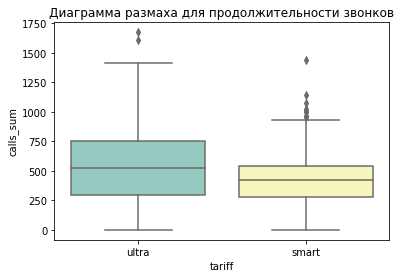

In [40]:
sns.boxplot (x = 'tariff', y = 'calls_sum', 
             data = proceeds_data, 
             width = 0.8, 
             palette="Set3")

plt.title('Диаграмма размаха для продолжительности звонков')
plt.show()

* Медианное значение продолжительности звонков для пользователей тарифа "Ultra" составляет 550 минут, для пользователей тарифа "Smart" - 400 минут.
* Большинство звонков укладываются по продолжительности в допустимое количество минут, особенно для пользователей тарифа "Ultra", небольшая доля пользователей тарифа "Smart" превышает допустимое количество минут в месяц.

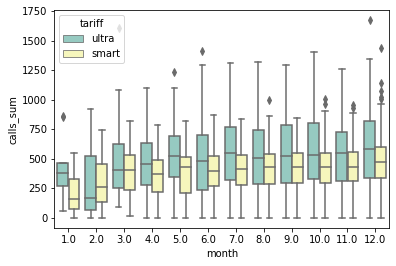

In [41]:
sns.boxplot (x = 'month', y = 'calls_sum', hue = 'tariff', 
             data = proceeds_data, 
             width = 0.8, 
             palette="Set3")



plt.show()

* Диаграммы размаха по месяцам позволяют сделать вывод что пользователи тарифа "Ultra" преимущественно укладываются в допустимое количество минут в месяц.
* Большинство звонков пользователей тарифа "Ultra" не превышает по продолжительности 750 минут в месяц из допустимых 1000.
* Пользователи тарифа "Smart" в основном стараются не превышать допустимое значений 500 минут в месяц, при этом, расходование минут в месяц получается стремящимся к максимально допустимому значению.
* Для пользователей тарифа "Smart" есть заметно более активные месяцы, в которые для части пользователей превышение происходит, например, в декабре 2018 года. При этом, в январе, наоборот, заметно снижена была разговорная активность пользователей тарифа.     

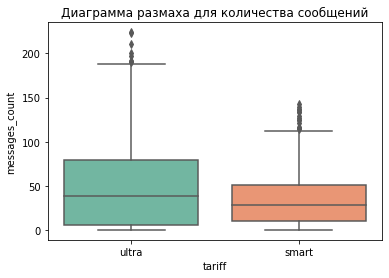

In [42]:
sns.boxplot (x = 'tariff', y = 'messages_count', 
             data = proceeds_data, 
             width = 0.8, 
             palette="Set2")

plt.title('Диаграмма размаха для количества сообщений')
plt.show()

Медианное значение количества сообщений для пользователей тарифа "Ultra" составляет 50, для пользователей тарифа "Smart" - 30.
Большинство сообщений укладываются по количеству в допустимое, особенно для пользователей тарифа "Ultra", небольшая доля пользователей тарифа "Smart" превышает допустимое количество сообщений в месяц.

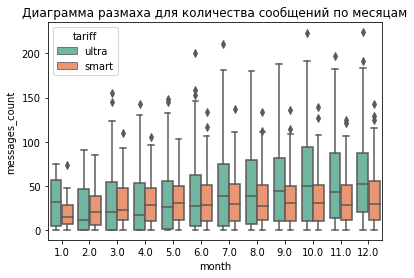

In [43]:
sns.boxplot (x = 'month', y = 'messages_count', hue = 'tariff', 
             data = proceeds_data, 
             width = 0.8, 
             palette="Set2")

plt.title('Диаграмма размаха для количества сообщений по месяцам')
plt.show()

* Диаграммы размаха по месяцам позволяют сделать вывод что пользователи тарифа "Ultra" преимущественно укладываются в допустимое количество сообщений в месяц.
* Пользователь тарифа "Smart" также преимущественно не превышают допустимое количество сообщений в месяц.
* Медианные значения для тарифа "Smart" составляют для большинства месяцев 25 при допустимых 50, для тарифа "Ultra"- 50 при допустимых 100.

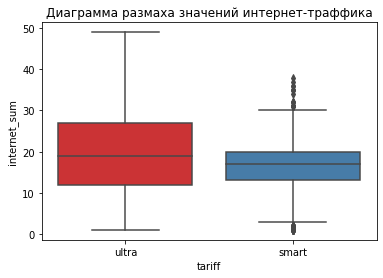

In [44]:
sns.boxplot (x = 'tariff', y = 'internet_sum', 
             data = proceeds_data, 
             width = 0.8, 
             palette="Set1")

plt.title('Диаграмма размаха значений интернет-траффика')
plt.show()

* Медианное значение интернет-траффика для пользователей тарифа "Ultra" составляет 18 Гб, для пользователей тарифа "Smart" - 15 Гб.
* Большинство сессий укладываются по объему траффика в допустимое количество для пользователей тарифа "Ultra".
* Пользователи тарифа "Smart" преимущественно расходуют большее количество трафика, чем допустимо по тарифу в месяц. 
* Наибольшее влияние на добавочную стоимость по тарифу "Smart" оказывает превышение расхода интернет-трафика сверх установленного лимита 15 Гб.

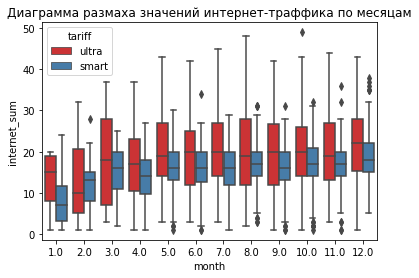

In [45]:
sns.boxplot (x = 'month', y = 'internet_sum', hue = 'tariff', 
             data = proceeds_data, 
             width = 0.8, 
             palette="Set1")

plt.title('Диаграмма размаха значений интернет-траффика по месяцам')
plt.show()

* Диаграммы размаха по месяцам позволяют сделать вывод что пользователи тарифа "Ultra" преимущественно укладываются в допустимое количество Гб в месяц.
* Медианные значения для тарифа "Smart" составляют для большинства месяцев 15  Гб при допустимых 15, для тарифа "Ultra"- 18 Гб при допустимых 30.

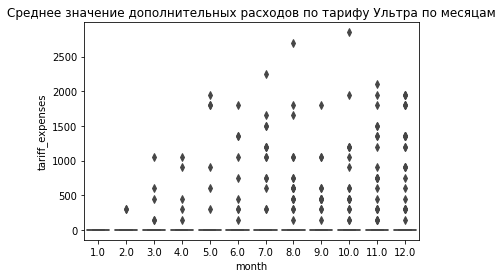

In [46]:
sns.boxplot (x = 'month', y = 'tariff_expenses', 
             data = proceeds_data.query('tariff == "ultra"'), 
             width = 0.8)

plt.title('Среднее значение дополнительных расходов по тарифу Ультра по месяцам')
plt.show()

* Для тарифа Ultra характерен невысокий процент пользователей с дополнительными платежами. 
* Причины дополнительных расходов связаны и с превышением количества допустимых минут, и с превышением количества отправляемых сообщений и с расходовванием интернет-трафика.
* При этом, для большинства пользователей лимиты, заявленные в тарифе Ultra являются достаточными и остаются неизрасходованные запасы как минут, так и сообщений и интернет-траффика.

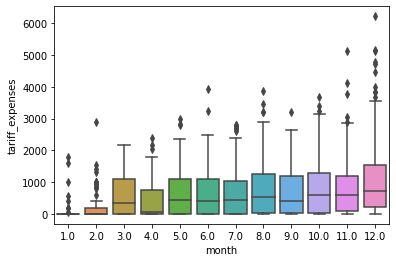

In [47]:
sns.boxplot (x = 'month', y = 'tariff_expenses', 
             data = proceeds_data.query('tariff == "smart"'), 
             width = 0.8)

'Среднее значение дополнительных расходов по тарифу Смарт по месяцам'
plt.show()

* Для тарифа Smart характерно наличие дополнительных расходов в месяц для большинства пользователей.
* Медианное значение дополнительных расходов - 500 рублей сверх стоимости тарифа (550 рублей). 
* Наибольшее влияние на высокие дополнительные расходы оказывает недостаток интернет-траффика.
* При этом, суммарные затраты в месяц с учетом стоимости тарифа не превышают ежемесячной оплаты за тариф Ultra.
* Оптимальным мог бы стать тариф с большим количеством Гб (примерно 20 Гб вместо 15 Гб), при этом количество минут и сообщений может быть таким же как в тарифе Smart.

### Общие выводы о поведение клиентов оператора:<a class="anchor" id="seventh-bullet"></a>

* Медианное значение продолжительности звонков для пользователей тарифа "Ultra" составляет 550 минут, для пользователей тарифа "Smart" - 400 минут.
* Большинство звонков укладываются по продолжительности в допустимое количество минут, особенно для пользователей тарифа "Ultra", небольшая доля пользователей тарифа "Smart" превышает допустимое количество минут в месяц.
* Пользователи тарифа "Ultra" преимущественно укладываются в допустимое количество сообщений в месяц.
* Пользователь тарифа "Smart" также преимущественно не превышают допустимое количество сообщений в месяц.
* Медианные значения количества сообщений для тарифа "Smart" составляют для большинства месяцев 25 при допустимых 50, для тарифа "Ultra"- 50 при допустимых 100.
* Меедианное значение интернет-траффика для пользователей тарифа "Ultra" составляет 18 Гб, для пользователей тарифа "Smart" - 15 Гб.
* Большинство сессий укладываются по объему траффика в допустимое количество для пользователей тарифа "Ultra".
* Пользователи тарифа "Smart" преимущественно расходуют большее количество трафика, чем допустимо по тарифу в месяц.
* Наибольшее влияние на добавочную стоимость по тарифу "Smart" оказывает превышение расхода интернет-трафика сверх установленного лимита 15 Гб.
* Для тарифа Ultra характерен невысокий процент пользователей с дополнительными платежами.
* Причины дополнительных расходов связаны и с превышением количества допустимых минут, и с превышением количества отправляемых сообщений и с расходовванием интернет-трафика.
* Для большинства пользователей лимиты, заявленные в тарифе Ultra являются достаточными и остаются неизрасходованные запасы как минут, так и сообщений и интернет-траффика.
* Для тарифа Smart характерно наличие дополнительных расходов в месяц для большинства пользователей.
* Медианное значение дополнительных расходов - 500 рублей сверх стоимости тарифа (550 рублей).
* Наибольшее влияние на высокие дополнительные расходы оказывает недостаток интернет-траффика.
* При этом, суммарные затраты в месяц с учетом стоимости тарифа не превышают ежемесячной оплаты за тариф Ultra.
* Оптимальным мог бы стать тариф с большим количеством Гб (примерно 20 Гб вместо 15 Гб), при этом количество минут и сообщений может быть таким же как в тарифе Smart.


In [48]:
# формирование выборки из 500 элементов по звонкам тарифа Smart
smart_calls = proceeds_data.query('tariff == "smart"')['calls_sum'].tolist()
smart_calls = random.choices(smart_calls, k=500)

# формирование выборки из 500 элементов по сообщениям тарифа Smart
smart_messages = proceeds_data.query('(tariff == "smart") | (messages_count > 0)')['messages_count'].tolist()
smart_messages = random.choices(smart_messages, k=500)

# формирование выборки из 500 элементов по интернет-траффику тарифа Smart
smart_internet = proceeds_data.query('tariff == "smart"')['internet_sum'].tolist()
smart_internet = random.choices(smart_internet, k=500)

calls_mean = proceeds_data.query('tariff == "smart"')['calls_sum'].mean()  #оценка среднего по выборке по звонкам тарифа Smart
disp_calls = np.var(smart_calls, ddof=1) #оценка дисперсии по выборке по звонкам тарифа Smart
standart_smart = np.std(smart_calls, ddof=1) #оценка стандартного отклонения по выборке по звонкам тарифа Smart

messages_mean = proceeds_data.query('tariff == "smart"')['messages_count'].mean() 
# оценка среднего по выборке по сообщениям тарифа Smart
disp_messages = np.var(smart_messages, ddof=1)
# оценка дисперсии по выборке по сообщениям тарифа Smart
standart_messages = np.std(smart_messages, ddof=1)
# оценка стандартного отклонения по выборке по сообщениям тарифа Smart

internet_mean = proceeds_data.query('tariff == "smart"')['internet_sum'].mean()
# оценка среднего по выборке по интернет-траффику тарифа Smart
disp_internet = np.var(smart_internet, ddof=1)
# оценка дисперсии по выборке по интернет-траффику тарифа Smart
standart_internet = np.std(smart_internet, ddof=1)
# оценка стандартного отклонения по выборке по интернет-траффику тарифа Smart

# формирование выборки из 500 элементов по звонкам тарифа Ultra
ultra_calls = proceeds_data.query('tariff == "ultra"')['calls_sum'].tolist()
ultra_calls = random.choices(ultra_calls, k=500)

# формирование выборки из 500 элементов по сообщениям тарифа Ultra
ultra_messages = proceeds_data.query('(tariff == "ultra") | (messages_count > 0)')['messages_count'].tolist()
ultra_messages = random.choices(ultra_messages, k=500)

# формирование выборки из 500 элементов по интернет-траффику тарифа Ultra
ultra_internet = proceeds_data.query('tariff == "ultra"')['internet_sum'].tolist()
ultra_internet = random.choices(ultra_internet, k=500)

calls_mean_ultra = proceeds_data.query('tariff == "ultra"')['calls_sum'].mean() 
#оценка среднего по выборке по звонкам тарифа Ultra
disp_calls_ultra = np.var(ultra_calls, ddof=1)
#оценка дисперсии по выборке по звонкам тарифа Ultra
standart_ultra = np.std(ultra_calls, ddof=1)
#оценка стандартного отклонения по выборке по звонкам тарифа Ultra

messages_mean_ultra = proceeds_data.query('tariff == "ultra"')['messages_count'].mean()
# оценка среднего по выборке по сообщениям тарифа Ultra
disp_messages_ultra = np.var(ultra_messages, ddof=1)
# оценка дисперсии по выборке по сообщениям тарифа Ultra
standart_messages_ultra = np.std(ultra_messages, ddof=1)
# оценка стандартного отклонения по выборке по сообщениям тарифа Ultra

internet_mean_ultra = proceeds_data.query('tariff == "ultra"')['internet_sum'].mean()
# оценка среднего по выборке по интернет-траффику тарифа Ultra
disp_internet_ultra = np.var(ultra_internet, ddof=1)
# оценка дисперсии по выборке по интернет-траффику тарифа Ultra
standart_internet_ultra = np.std(ultra_internet, ddof=1)
# оценка стандартного отклонения по выборке по интернет-траффику тарифа Ultra

In [49]:
smart_data = {'выборка': ['звонки', 'сообщения', 'интернет'], 'среднее значение': [calls_mean, messages_mean, internet_mean], 
              'дисперсия': [disp_calls, disp_messages, disp_internet], 'cтандартное отклонение': [standart_smart, standart_messages, standart_internet]}
smart_sample = pd.DataFrame(data=smart_data)
smart_sample = np.round_(smart_sample , decimals=2)

ultra_data = {'выборка': ['звонки', 'сообщения', 'интернет'], 'среднее значение': [calls_mean_ultra, messages_mean_ultra, internet_mean_ultra], 
              'дисперсия': [disp_calls_ultra, disp_messages_ultra, disp_internet_ultra], 'cтандартное отклонение': [standart_ultra, standart_messages_ultra, standart_internet_ultra]}
ultra_sample = pd.DataFrame(data=ultra_data)
ultra_sample = np.round_(ultra_sample , decimals=2)

In [50]:
smart_sample

,выборка,среднее значение,дисперсия,cтандартное отклонение
0,звонки,418.27,37794.67,194.41
1,сообщения,33.41,1191.45,34.52
2,интернет,16.34,33.76,5.81


In [51]:
ultra_sample

,выборка,среднее значение,дисперсия,cтандартное отклонение
0,звонки,530.18,86363.75,293.88
1,сообщения,49.63,1405.52,37.49
2,интернет,19.71,98.95,9.95


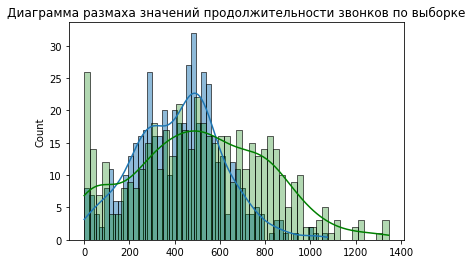

In [52]:
sns.histplot(data=smart_calls, bins = 50, kde=True)
sns.histplot(data=ultra_calls, bins = 50, color = 'g', alpha=0.3, kde=True)
plt.title('Диаграмма размаха значений продолжительности звонков по выборке')
plt.show()

* Среднее значение продолжительности звонков для пользователей тарифа "Smart" составляет 418 минут, стандартное отклонение составляет 185 минут
* Для пользователей тарифа "Ultra" среднее значение продолжительности звонков  - 430 минут, стандартное отклонение 301 минута.
* Большинство звонков укладываются по продолжительности в допустимое количество минут, особенно для пользователей тарифа "Ultra", небольшая доля пользователей тарифа "Smart" превышает допустимое количество минут в месяц.

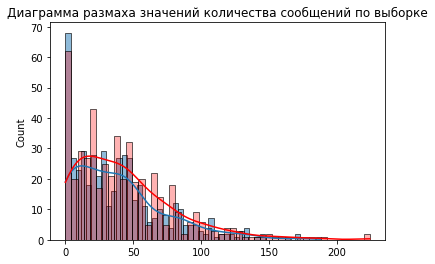

In [53]:
sns.histplot(data=smart_messages, bins = 50, kde=True)
sns.histplot(data=ultra_messages, bins = 50, color = 'r', alpha=0.3, kde=True)
plt.title('Диаграмма размаха значений количества сообщений по выборке')
plt.show()

* Среднее значение количества сообщений для пользователей тарифа "Smart" составляет 33, стандартное отклонение составляет 31
* Для пользователей тарифа "Ultra" среднее значение количества сообщений 50, стандартное отклонение 37. 


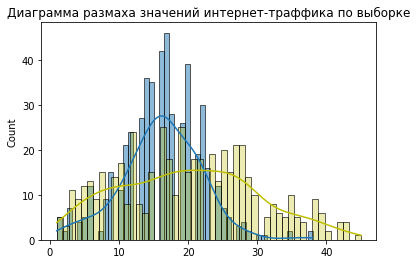

In [54]:
sns.histplot(smart_internet, bins = 50, kde=True)
sns.histplot(data=ultra_internet, bins = 50, color = 'y', alpha=0.3, kde=True)
plt.title('Диаграмма размаха значений интернет-траффика по выборке')
plt.show()

* Среднее значение количества интернет-траффика для пользователей тарифа "Smart" составляет 16,3 Гб, стандартное отклонение составляет 5,56 Гб.
* Для пользователей тарифа "Ultra" среднее значение количества интернет-траффика 19,7 Гб, стандартное отклонение 10 Гб.

### Общие выводы о поведение клиентов оператора:<a class="anchor" id="seventh-bullet"></a>

* Среднее значение продолжительности звонков для пользователей тарифа "Smart" составляет 418 минут, стандартное отклонение составляет 185 минут
* Для пользователей тарифа "Ultra" среднее значение продолжительности звонков - 430 минут, стандартное отклонение 301 минута.
* Большинство звонков укладываются по продолжительности в допустимое количество минут, особенно для пользователей тарифа "Ultra", небольшая доля пользователей тарифа "Smart" превышает допустимое количество минут в месяц.
* Пользователи тарифа "Ultra" преимущественно укладываются в допустимое количество сообщений в месяц.
* Пользователь тарифа "Smart" также преимущественно не превышают допустимое количество сообщений в месяц.
* Среднее значение количества сообщений для пользователей тарифа "Smart" составляет 33, стандартное отклонение составляет 31
* Для пользователей тарифа "Ultra" среднее значение количества сообщений 50, стандартное отклонение 37.
* Среднее значение количества интернет-траффика для пользователей тарифа "Smart" составляет 16,3 Гб, стандартное отклонение составляет 5,56 Гб.
Для пользователей тарифа "Ultra" среднее значение количества интернет-траффика 19,7 Гб, стандартное отклонение 10 Гб.
* Большинство сессий укладываются по объему траффика в допустимое количество для пользователей тарифа "Ultra".
* Пользователи тарифа "Smart" преимущественно расходуют большее количество трафика, чем допустимо по тарифу в месяц.
* Наибольшее влияние на добавочную стоимость по тарифу "Smart" оказывает превышение расхода интернет-трафика сверх установленного лимита 15 Гб.
* Для тарифа Ultra характерен невысокий процент пользователей с дополнительными платежами.
* Причины дополнительных расходов связаны и с превышением количества допустимых минут, и с превышением количества отправляемых сообщений и с расходовванием интернет-трафика.
* Для большинства пользователей лимиты, заявленные в тарифе Ultra являются достаточными и остаются неизрасходованные запасы как минут, так и сообщений и интернет-траффика.
* Для тарифа Smart характерно наличие дополнительных расходов в месяц для большинства пользователей.
* Наибольшее влияние на высокие дополнительные расходы оказывает недостаток интернет-траффика.


### Проверка гипотез <a class="anchor" id="eight-bullet"></a>

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Для проверки гипотез необходисо использовать случайную выборку. 

В этом случае среднее и дисперсия, рассчитанные по выборочным данным, называются выборочным средним и выборочной дисперсией.

Если выборка взята случайным образом и в ней больше 30 элементов (читайте — чисел), то выборочные среднее и дисперсия близки к реальным среднему и дисперсии генеральной совокупности.

Сформулируем нулевую и альтернативную гипотезу и далее на основе данных сделаем выбор: отклонить нулевую гипотезу в пользу альтернативной или нет. Для этого нужно посчитать вероятность получить наблюдаемое на выборке значение (чаще всего, среднее) при условии, что нулевая гипотеза верна. 

#### Нулевая гипотеза: Гипотеза о равенстве средних двух генеральных совокупностей средней выручки пользователей тарифов «Ультра» и «Смарт».
#### Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются   
    

* Применим t-тест т.к. генеральные совокупности не зависят друг от друга. 
* Выборочные средние нормально распределены. 
* Установим параметр equal_var как False, и тест посчитает дисперсии выборок по отдельности.

In [55]:
smart_random = proceeds_data.query('tariff == "smart"')
smart_random = smart_random['pay_info'].tolist()

In [56]:
ultra_random = proceeds_data.query('tariff == "ultra"')
ultra_random = ultra_random['pay_info'].tolist()

In [57]:
disp_smart = np.var(smart_random, ddof=1)
standart_smart = np.std(smart_random, ddof=1)

In [58]:
print ('Дисперсия по средней выручке тарифа Smart', disp_smart.round(2))
print ('Стандартное отклонение по средней выручке тарифа Smart', standart_smart.round(2))

Дисперсия по средней выручке тарифа Smart 669895.08
Стандартное отклонение по средней выручке тарифа Smart 818.47


In [59]:
disp_ultra = np.var(ultra_random, ddof=1)
standart_ultra = np.std(ultra_random, ddof=1)

In [60]:
print ('Дисперсия по средней выручке тарифа Ultra', disp_ultra.round(2))
print ('Стандартное отклонение по средней выручке тарифа Ultra', standart_ultra.round(2))

Дисперсия по средней выручке тарифа Ultra 142951.57
Стандартное отклонение по средней выручке тарифа Ultra 378.09


#### Проверка нулевой гипотезы о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт».

In [61]:
alpha = .05 # критический уровень статистической значимости
            # можно указать .05 или 0.05 
results = st.ttest_ind(smart_random, ultra_random, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.156822758433927e-248
Отвергаем нулевую гипотезу


* Верна альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
* В случае равенства выручки пользователей тарифов «Ультра» и «Смарт» последним имело бы смысл рекомендовать переход на тариф Ультра с учетом проанализированного поведения пользователей.

#### Нулевая гипотеза: Гипотеза о равенстве средних двух генеральных совокупностей средней выручки пользователей из Москвы и пользователей вне Москвы
#### Альтернативная гипотеза: средняя выручка пользователей из Москвы и пользователей вне Москвы отличаются

In [62]:
moscow_random = proceeds_data.query('city == "Москва"')
moscow_random = moscow_random['pay_info'].tolist()
# moscow_random = random.choices(moscow_random, k=200)

In [63]:
moscow_out_random = proceeds_data.query('city != "Москва"')
moscow_out_random = moscow_out_random['pay_info'].tolist()
# moscow_out_random = random.choices(moscow_out_random, k=200)

#### Проверка нулевой гипотезы о равенстве средней выручки пользователей из Москвы и вне Москвы

In [64]:
alpha = .05 # критический уровень статистической значимости
            # можно указать .05 или 0.05
results = st.ttest_ind(
    moscow_random, 
    moscow_out_random, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5062840838357682
Не получилось отвергнуть нулевую гипотезу


* С заданным уровнем критической значимости не получилось отвергнуть нулевую гипотезу
* Средние выручки пользователей в Москве и вне Москвы сопоставимы
* Можно сделать вывод что пользовательские предпочтения абонентов не зависят явным образом от месторасположения города.

### Общие выводы <a class="anchor" id="ninth-bullet"></a>
* В ходе работы проведен первичный анализ данных, выявлено отсутствие пропусков в данных, проанализированы все датасеты на аномальные значения столбцов. Существенные аномалии не выявлены, данных достаточно хорошего качества, их достаточно для решения поставленных задач.

* Сформированы сводные таблицы, сгруппированных по пользователям и месяцам, которые позвляют проанализировать пльзовательские предпочтения в зависимости от тарифа: среднюю прдлжительность разговоров, среднее количество собщений, объем расхдуемого интернет-траффика.

* Анализ пльзвательской активности в зависимости от тарифа позволяет сделать вывод что абоненты тарифа Ультра не превышают заявленные в тарифе лимиты, которые являются высокими и часто остаются с запасом.
* Абоненты тарифа Смарт часто выходят за установленные лимиты, особенно по интернет-траффику. Также есть превышения по минутам разговоров, при этом, добавочная стоимость минут высокая.
* Проверены гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
  средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
* Первая гипотеза получила подтверждение: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
* В случае равенства выручки пользователей тарифов «Ультра» и «Смарт» последним имело бы смысл рекомендовать переход на тариф Ультра с учетом проанализированного поведения пользователей.
* Т.к. выручка отличается можно сделать следующий вывод: оптимальным мог бы стать тариф с большим количеством Гб (примерно 20 Гб вместо 15 Гб), при этом количество минут и сообщений может быть таким же как в тарифе Smart. Т.к. многие пользователи выходят за пределы предложенного в тарифе Смарт пакета, но при этом общая стоимость затрат ниже чем при подключении тарифа Ультра.
* Вторая гипотеза не подтвердилась: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.
* пользовательские предпочтения абонентов не зависят явным образом от месторасположения города.